# DSCI 303 - Homework 08

### Mallory Stern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

## Problem 1: NYC Restaurants Dataset

In [2]:
nyc = pd.read_table('nyc.txt', sep='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:,1:6].values
y1 = nyc.iloc[:,0].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

print(f'Training Features Shape: {X_train_1.shape}')
print(f'Test Features Shape:     {X_test_1.shape}')


Training Features Shape: (134, 5)
Test Features Shape:     (34, 5)


In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

print('Intercept:   ', nyc_mod.intercept_)
print('Coefficients:', nyc_mod.coef_)

Intercept:    -23.75543532248895
Coefficients: [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
train_nyc = nyc_mod.score(X_train_1, y_train_1)
test_nyc = nyc_mod.score(X_test_1, y_test_1)

print(f'Training r-Squared: {train_nyc:.4f}')
print(f'Testing r-Squared: {test_nyc:.4f}')

Training r-Squared: 0.6306
Testing r-Squared: 0.6245


In [6]:
test_pred_1 = nyc_mod.predict(X_test_1)

print(f'Observed Prices:  {X_test_1[:10 , :1].tolist()}')
print(f'Estimated Prices: {np.round(test_pred_1[:10], 2)}')

Observed Prices:  [[19], [20], [24], [21], [21], [21], [18], [22], [23], [20]]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
nyc_new = pd.DataFrame({
    'Food' : [22, 18, 25],
    'Decor' : [12, 19, 22],
    'Service' : [20, 22, 18],
    'Wait' : [15, 34, 36],
    'East' : [0, 1, 0]
})

food_items = nyc_new.iloc[:5].values

new_pred_1 = nyc_mod.predict(nyc_new)
print(f'Estimated Prices : {np.round(new_pred_1, 2)}')

Estimated Prices : [30.87 42.57 58.06]


/Users/mj/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Problem 2: Diamonds Dataset

In [8]:
diamonds = pd.read_table('diamonds.txt', sep='\t')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds.loc[:, 'ln_carat'] = np.log(diamonds['carat'])
diamonds.loc[:, 'ln_price'] = np.log(diamonds['price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


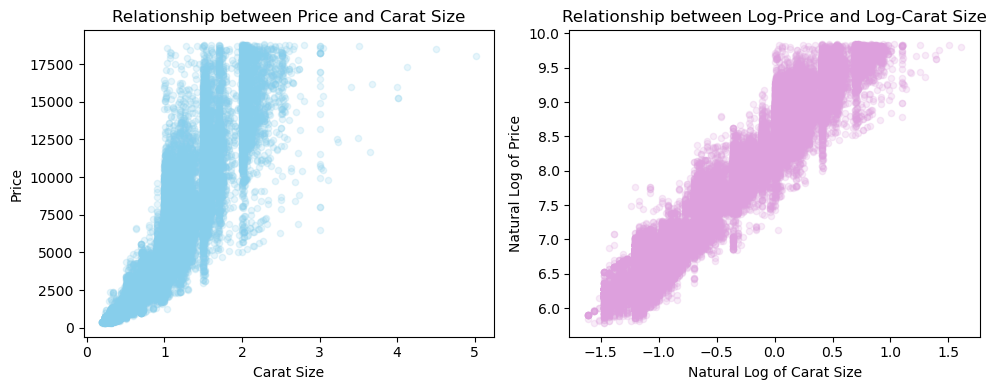

In [10]:
plt.figure(figsize = [10, 4])

plt.subplot(1, 2, 1)
plt.scatter(x = diamonds.carat, y = diamonds.price, s = 20, alpha = 0.2, 
            color = 'SkyBlue')
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.title('Relationship between Price and Carat Size')

plt.subplot(1, 2, 2)
plt.scatter(x = diamonds.ln_carat, y = diamonds.ln_price, s = 20, alpha = 0.2, 
            color = 'Plum')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.tight_layout()
plt.show()

In [11]:
X2 = diamonds.iloc[:,[-2]].values
y2 = diamonds.iloc[:,-1].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1, random_state = 1)

print(f'Training Features Shape: {X_train_2.shape}')
print(f'Test Features Shape:     {X_test_2.shape}')

Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)


In [12]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

print('Intercept:   ', dia_mod.intercept_)
print('Coefficients:', dia_mod.coef_)

Intercept:    8.448298621179188
Coefficients: [1.67493107]


In [13]:
train_dia = dia_mod.score(X_train_2, y_train_2)
test_dia = dia_mod.score(X_test_2, y_test_2)

print(f'Training r-Squared: {train_dia:.4f}')
print(f'Testing r-Squared:  {test_dia:.4f}')

Training r-Squared: 0.9330
Testing r-Squared:  0.9328


In [14]:
test_pred_2 = dia_mod.predict(X_test_2)

print(f'Observed Prices:  {X_test_2[:10 , :1].tolist()}')
print(f'Estimated Prices: {np.round(test_pred_2[:10])}')

Observed Prices:  [[-1.1086626245216111], [0.1823215567939546], [-0.4780358009429998], [-1.0788096613719298], [0.1823215567939546], [-0.6348782724359695], [0.0769610411361284], [-0.8915981192837836], [0.4054651081081644], [-1.0498221244986778]]
Estimated Prices: [7. 9. 8. 7. 9. 7. 9. 7. 9. 7.]


In [17]:
diamonds_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0]).reshape(6,1)
new_pred_2 = dia_mod.predict(diamonds_new)

print(f'Estimated Prices: {np.round(new_pred_2)}')

Estimated Prices: [ 9. 10. 11. 12. 13. 13.]


## Problem 3: Heart Disease Dataset

In [19]:
hd = pd.read_table('heart_disease.txt', sep='\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [25]:
X3 = hd.iloc[:,[-1]].values
y3 = hd.loc[:,'heart_disease'].values

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size = 0.1, random_state = 1, stratify=y3)

print(f'Training Features Shape: {X_train_3.shape}')
print(f'Test Features Shape:     {X_test_3.shape}')


Training Features Shape: (243, 1)
Test Features Shape:     (27, 1)


In [30]:
hd_mod = LogisticRegression(solver = 'lbfgs', penalty = None, max_iter = 2000)
hd_mod.fit(X_train_3, y_train_3)

np.set_printoptions(suppress = True)
print('Intercept:   ',  hd_mod.intercept_)
print('Coefficients:', hd_mod.coef_)

Intercept:    [-43.19690951]
Coefficients: [[28.75549924]]


In [31]:
train_acc = hd_mod.score(X_train_3, y_train_3)
test_acc = hd_mod.score(X_test_3, y_test_3)

print(f'Training Accuracy:', {np.round(train_acc,4)})
print(f'Testing Accuracy: ', {np.round(test_acc,4)})

Training Accuracy: {1.0}
Testing Accuracy:  {1.0}


In [37]:
print(f'Observed Labels:  {X_test_3[:20].tolist()}')
print(f'Predicted Labels: {hd_mod.predict(X_test_3[:20])}')

Observed Labels:  [[1], [2], [1], [1], [2], [2], [2], [2], [1], [1], [2], [1], [1], [1], [1], [2], [1], [2], [1], [1]]
Predicted Labels: [1 2 1 1 2 2 2 2 1 1 2 1 1 1 1 2 1 2 1 1]


## Problem 4: Gapminder Dataset

In [42]:
gm = pd.read_table('gapminder_data.txt', sep='\t')
sel = gm.loc[:,'year'] == 2018
gm18 = gm.loc[sel, :]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4
